In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [57]:
df_train= pd.read_csv("F:\intern data science\Train.csv")
df_test=pd.read_csv("F:\intern data science\Test.csv")

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#df_test

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [12]:
# item weight is numerical we impute with mean imputation
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [13]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# for categorical column mode imputation
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
mode_of_outlet_size= df_train.pivot_table(values='Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]) )

In [16]:
mode_of_outlet_size= df_test.pivot_table(values='Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]) )

In [17]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [18]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [19]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [21]:
#Data Analysis
#numerical features

In [22]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
sns.set()

<Figure size 432x432 with 0 Axes>

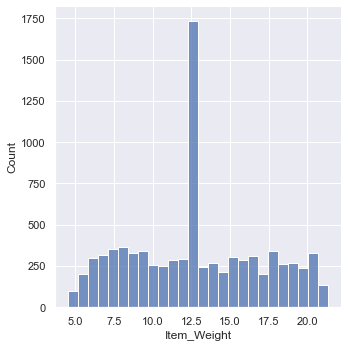

In [24]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.displot(df_train['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

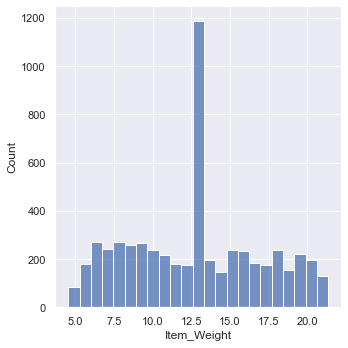

In [25]:
plt.figure(figsize=(6,6))
sns.displot(df_test['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

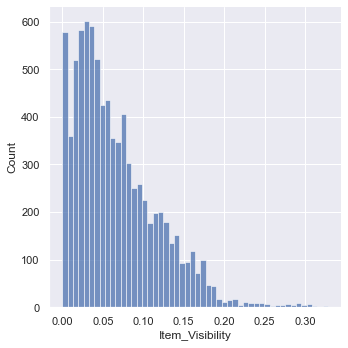

In [26]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(df_train['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

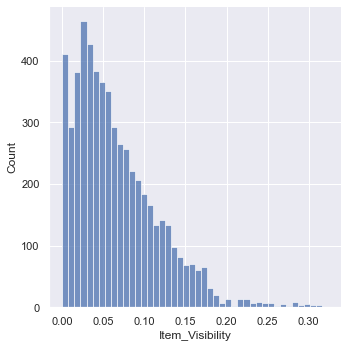

In [27]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(df_test['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

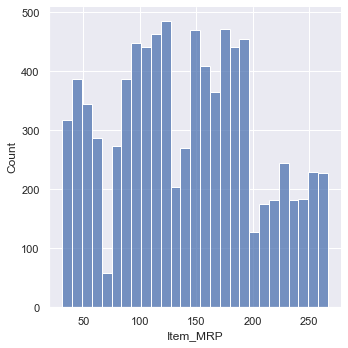

In [28]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(df_train['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

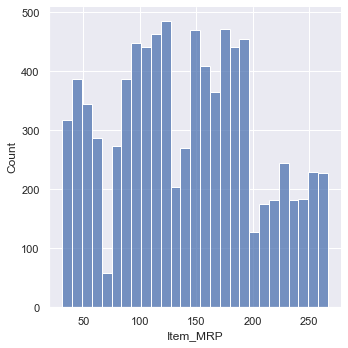

In [29]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(df_train['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

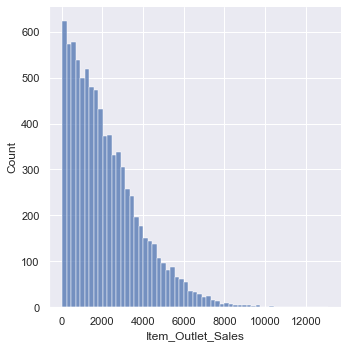

In [30]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(df_train['Item_Outlet_Sales'])
plt.show()

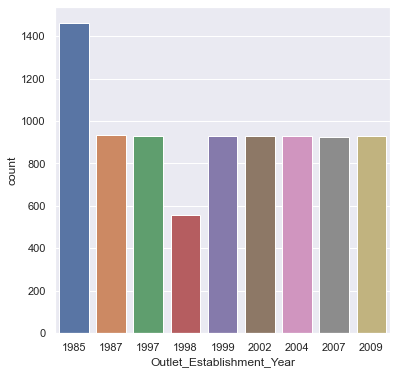

In [31]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df_train)
plt.show()

In [32]:
#Categorical features
#Item_Identifier              
#Item_Fat_Content
#Item_Type
#Outlet_Identifier
#Outlet_Size
#Outlet_Location_Type
#Outlet_Type

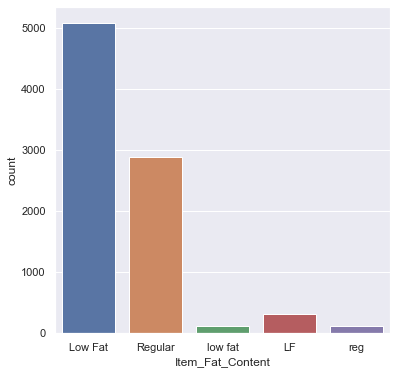

In [33]:
#Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df_train)
plt.show()

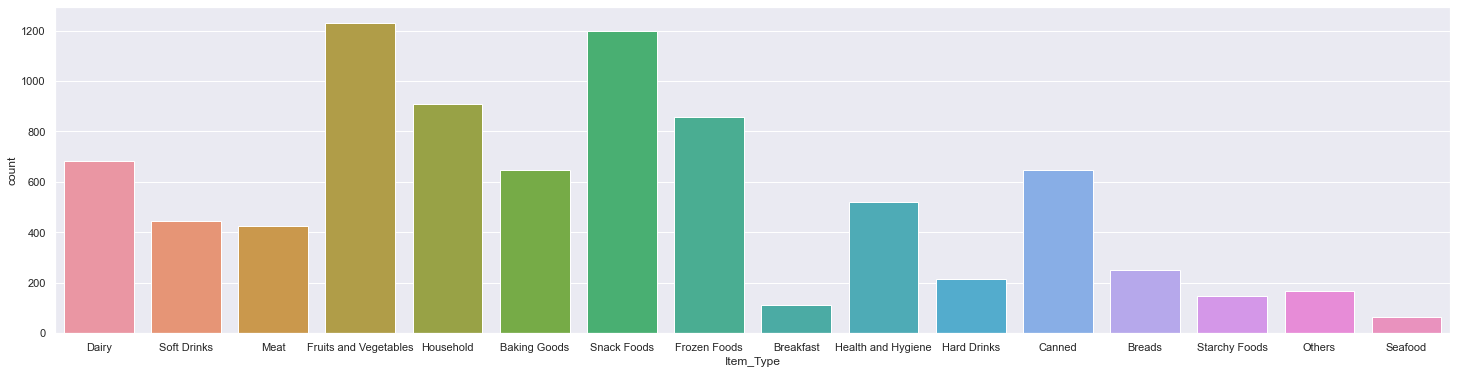

In [34]:
#Item_Type                     distribution
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data=df_train)
plt.show()

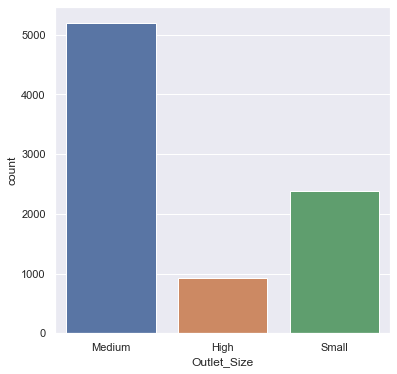

In [35]:
#Outlet_Size distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=df_train)
plt.show()

In [36]:
#Data preprocessing 
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [38]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [39]:
df_train.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [40]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
df_test.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [42]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [43]:
#Label encoding
encoder=LabelEncoder()

In [44]:
df_train['Item_Identifier']= encoder.fit_transform(df_train['Item_Identifier'])
df_train['Item_Fat_Content']= encoder.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier']= encoder.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size']= encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= encoder.fit_transform(df_train['Outlet_Type'])

In [45]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [46]:
df_test['Item_Identifier']= encoder.fit_transform(df_test['Item_Identifier'])
df_test['Item_Fat_Content']= encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']= encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier']= encoder.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size']= encoder.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']= encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']= encoder.fit_transform(df_test['Outlet_Type'])

In [47]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [51]:
#splitting features and targets
x =df_train.drop(columns='Item_Outlet_Sales',axis =1)
y =df_train['Item_Outlet_Sales']

In [52]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [53]:
#splitting data into training and testing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
print(x.shape,x_train.shape,x_test,x_test.shape)

(8523, 11) (6818, 11)       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
1112              496    12.857645                 0         0.099747   
1751              382    12.150000                 0         0.131446   
7648             1207     5.800000                 0         0.131221   
7362             1415    17.000000                 0         0.087388   
5332              910    12.857645                 0         0.009585   
...               ...          ...               ...              ...   
3503              608    12.857645                 0         0.037505   
975               835    20.000000                 1         0.028118   
6190             1286    19.100000                 0         0.178273   
32                756    18.700000                 0         0.000000   
4433              845     6.780000                 1         0.085982   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
1112          6   75.2328 

In [59]:
#machine learning model training
#Regression
regressor = XGBRegressor()

In [60]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [61]:
#Evaluation
#prediction on training data
Training_data_prediction= regressor.predict(x_train)

In [62]:
# R  squared value
r2_train = metrics.r2_score(y_train,Training_data_prediction)

In [63]:
print('R squared value=',r2_train)

R squared value= 0.8549833167058186


In [65]:
#prediction on testing data
Test_data_prediction= regressor.predict(x_test)

In [66]:
# R  squared value
r2_test = metrics.r2_score(y_test,Test_data_prediction)

In [67]:
print('R squared value=',r2_test)

R squared value= 0.5191234777241828
